In [1]:
import numpy as np
import xarray as xr
from importlib import reload

from analysis_package import plotting_functions
from analysis_package import open_datasets
from analysis_package import derive_potential_density_values_TEST
from analysis_package import ecco_masks
from analysis_package import interpolation

interpolation = reload(interpolation)
ecco_masks = reload(ecco_masks)
plotting_functions = reload(plotting_functions)
open_datasets = reload(open_datasets)
derive_potential_density_values_TEST = reload(derive_potential_density_values_TEST)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
data_dir = "./nctiles_monthly/"

# PHIHYD: insitu pressure anomaly with respect to the depth integral of gravity and reference density (g*rho_reference)
PHIHYD_var_str = "PHIHYD"
# SALT: insitu salinity (psu)
SALT_var_str = "SALT"
# THETA: potential pressure (C)
THETA_var_str = "THETA"

######################################################################################################################
################################################### LOAD GRID ########################################################
######################################################################################################################

grid_path = "./ecco_grid/ECCOv4r3_grid.nc"
grid = xr.open_dataset(grid_path)

In [3]:
all_times_times_slice = np.arange(0,288)

#P_INSITU_ds_raw = open_datasets.open_combine_raw_ECCO_tile_files(data_dir, "P_INSITU", all_times_times_slice,rename_indices=False)
#T_INSITU_ds_raw = open_datasets.open_combine_raw_ECCO_tile_files(data_dir, "T_INSITU", all_times_times_slice,rename_indices=False)
#SALT_ds_raw = open_datasets.open_combine_raw_ECCO_tile_files(data_dir, "SALT", all_times_times_slice,rename_indices=True)
PDENS_ds_raw = open_datasets.open_combine_raw_ECCO_tile_files(data_dir, "PDENS", all_times_times_slice,rename_indices=False)


tile_coords = np.arange(0,13)
#P_INSITU_ds = P_INSITU_ds_raw.assign_coords(i=np.arange(0,90),j=np.arange(0,90),k=np.arange(0,50)).assign_coords(tile=tile_coords)
#T_INSITU_ds = T_INSITU_ds_raw.assign_coords(i=np.arange(0,90),j=np.arange(0,90),k=np.arange(0,50)).assign_coords(tile=tile_coords)
#SALT_ds = SALT_ds_raw.assign_coords(i=np.arange(0,90),j=np.arange(0,90),k=np.arange(0,50)).assign_coords(tile=tile_coords)
PDENS_ds = PDENS_ds_raw.assign_coords(i=np.arange(0,90),j=np.arange(0,90),k=np.arange(0,50)).assign_coords(tile=tile_coords).drop(["timstep","land","area","thic"])



Loaded PDENS over time slice  



In [29]:
# This script is for deriving these state values given ECCO variables


"""
for i in range(1,14):
    PDENS_ds, P_INSITU_ds, T_ISITU_ds = derive_potential_density_values_TEST.make_potential_density_dataset(PHIHYD_ds_raw.isel(tile=i-1), 
                                                                                            SALT_ds_raw.isel(tile=i-1), 
                                                                                            THETA_ds_raw.isel(tile=i-1), 
                                                                                            all_times_times_slice, 
                                                                                            ref_pressure=2000.)
    if i < 10:
        #PDENS_ds.to_netcdf("./nctiles_monthly/PDENS/PDENS.000"+str(i)+".nc")
        P_INSITU_ds.to_netcdf("../../Datasets-For-Projects/ECCO_Datasets/nctiles_monthly/P_INSITU/P_INSITU.000"+str(i)+".nc")
        print("saved P_INSITU.000"+str(i)+".nc")
        T_ISITU_ds.to_netcdf("../../Datasets-For-Projects/ECCO_Datasets/nctiles_monthly/T_INSITU/T_INSITU.000"+str(i)+".nc")
        print("saved T_INSITU.000"+str(i)+".nc")
    else:
        #PDENS_ds.to_netcdf("./nctiles_monthly/PDENS/PDENS.00"+str(i)+".nc")
        P_INSITU_ds.to_netcdf("../../Datasets-For-Projects/ECCO_Datasets/nctiles_monthly/P_INSITU/P_INSITU.00"+str(i)+".nc")
        print("saved P_INSITU.00"+str(i)+".nc")
        T_ISITU_ds.to_netcdf("../../Datasets-For-Projects/ECCO_Datasets/nctiles_monthly/T_INSITU/T_INSITU.00"+str(i)+".nc")
        print("saved T_INSITU.00"+str(i)+".nc")

    print("finished "+str(i))
"""

'\nfor i in range(1,14):\n    PDENS_ds, P_INSITU_ds, T_ISITU_ds = derive_potential_density_values_TEST.make_potential_density_dataset(PHIHYD_ds_raw.isel(tile=i-1), \n                                                                                            SALT_ds_raw.isel(tile=i-1), \n                                                                                            THETA_ds_raw.isel(tile=i-1), \n                                                                                            all_times_times_slice, \n                                                                                            ref_pressure=2000.)\n    if i < 10:\n        #PDENS_ds.to_netcdf("./nctiles_monthly/PDENS/PDENS.000"+str(i)+".nc")\n        P_INSITU_ds.to_netcdf("../../Datasets-For-Projects/ECCO_Datasets/nctiles_monthly/P_INSITU/P_INSITU.000"+str(i)+".nc")\n        print("saved P_INSITU.000"+str(i)+".nc")\n        T_ISITU_ds.to_netcdf("../../Datasets-For-Projects/ECCO_Datasets/nctiles_monthly

In [4]:
PDENS_darray_u_points, PDENS_u_slope, j = interpolation.interpolate_c_to_u(PDENS_ds.PDENS,grid)
PDENS_darray_v_points, PDENS_v_slope, j = interpolation.interpolate_c_to_v(PDENS_ds.PDENS,grid)

PDENS_U = PDENS_ds.rename({"i":"i_g"})*0 + PDENS_darray_u_points
PDENS_V = PDENS_ds.rename({"j":"j_g"})*0 + PDENS_darray_v_points

for i in range(1,14):

    if i < 10:
        #PDENS_ds.to_netcdf("./nctiles_monthly/PDENS/PDENS.000"+str(i)+".nc")
        PDENS_U.isel(tile=i-1).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"PDENS_U/PDENS_U.000"+str(i)+".nc")
        print("saved PDENS_U.000"+str(i)+".nc")
        PDENS_V.isel(tile=i-1).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"/PDENS_V/PDENS_V.000"+str(i)+".nc")        
        print("saved PDENS_V.000"+str(i)+".nc")
    else:
        #PDENS_ds.to_netcdf("./nctiles_monthly/PDENS/PDENS.00"+str(i)+".nc")
        PDENS_U.isel(tile=i-1).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"/PDENS_U/PDENS_U.00"+str(i)+".nc")
        print("saved PDENS_U.00"+str(i)+".nc")
        PDENS_V.isel(tile=i-1).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"/PDENS_V/PDENS_V.00"+str(i)+".nc")
        print("saved PDENS_V.00"+str(i)+".nc")

checkpoint 1
checkpoint 2
checkpoint 3
checkpoint 4
checkpoint 5
checkpoint 1
checkpoint 2
checkpoint 3
checkpoint 4
checkpoint 5
saved PDENS_U.0001.nc
saved PDENS_V.0001.nc
saved PDENS_U.0002.nc
saved PDENS_V.0002.nc
saved PDENS_U.0003.nc
saved PDENS_V.0003.nc
saved PDENS_U.0004.nc
saved PDENS_V.0004.nc
saved PDENS_U.0005.nc
saved PDENS_V.0005.nc
saved PDENS_U.0006.nc
saved PDENS_V.0006.nc
saved PDENS_U.0007.nc
saved PDENS_V.0007.nc
saved PDENS_U.0008.nc
saved PDENS_V.0008.nc
saved PDENS_U.0009.nc
saved PDENS_V.0009.nc
saved PDENS_U.0010.nc
saved PDENS_V.0010.nc
saved PDENS_U.0011.nc
saved PDENS_V.0011.nc
saved PDENS_U.0012.nc
saved PDENS_V.0012.nc
saved PDENS_U.0013.nc
saved PDENS_V.0013.nc


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

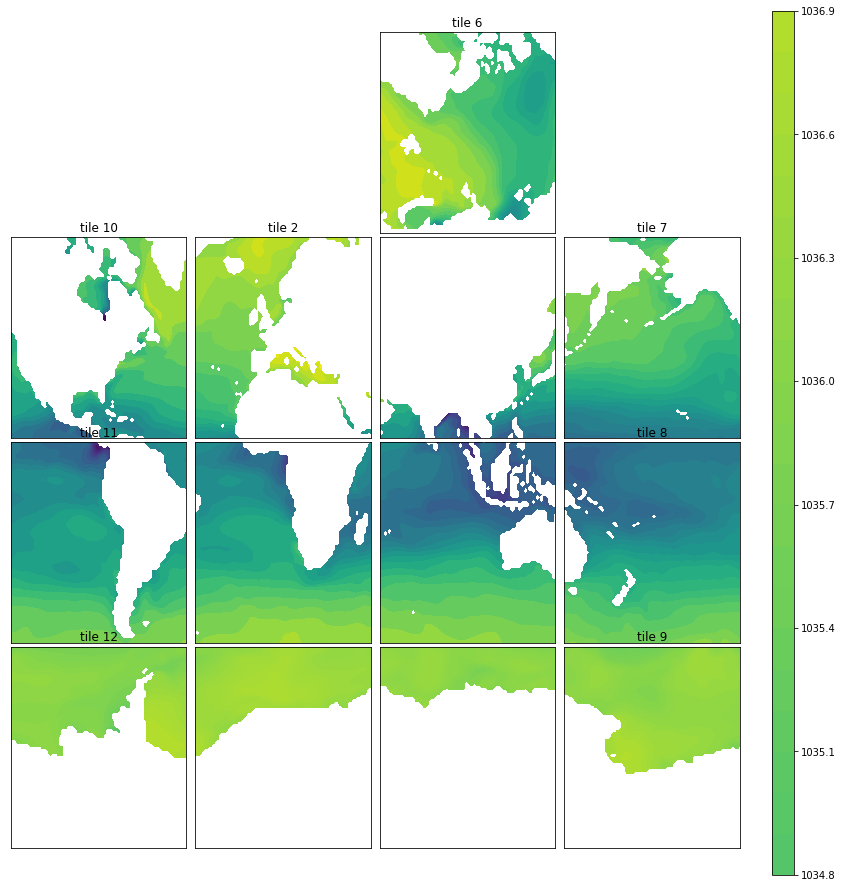

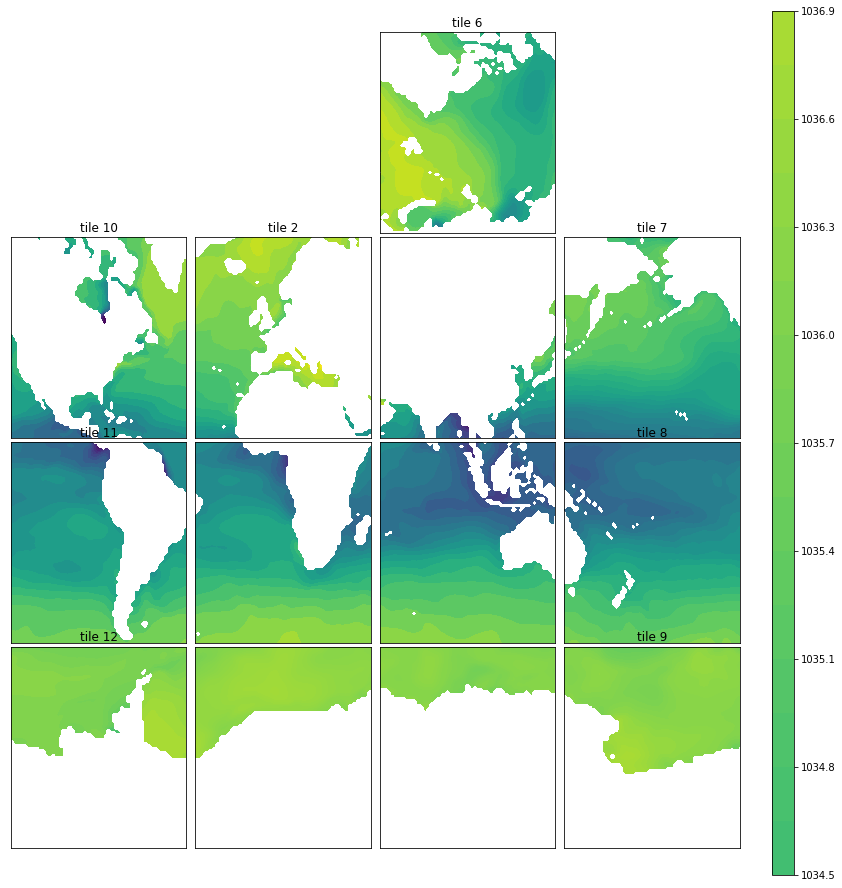

In [5]:
plotting_functions.world_plot(PDENS_darray_v_points.isel(k=0,time=0))
plotting_functions.world_plot(PDENS_darray_u_points.isel(k=0,time=0))

In [8]:
P_INSITU_at_u_points, slope, j = interpolation.interpolate_c_to_u(P_INSITU_ds.P_INSITU.isel(k=slice(0,1)),grid)
P_INSITU_at_v_points, slope, j = interpolation.interpolate_c_to_v(P_INSITU_ds.P_INSITU.isel(k=slice(0,1)),grid)

checkpoint 1
checkpoint 2
checkpoint 3
checkpoint 4
checkpoint 5
checkpoint 1
checkpoint 2
checkpoint 3
checkpoint 4
checkpoint 5


In [9]:
for i in range(1,14):

    if i < 10:
        #PDENS_ds.to_netcdf("./nctiles_monthly/PDENS/PDENS.000"+str(i)+".nc")
        P_INSITU_at_u_points.isel(tile=i-1,k=0).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"P_INSITU_U_surfacelvl/P_INSITU_U_surfacelvl.000"+str(i)+".nc")
        print("saved P_INSITU_U_surfacelvl.000"+str(i)+".nc")
        P_INSITU_at_v_points.isel(tile=i-1,k=0).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"/P_INSITU_V_surfacelvl/P_INSITU_V_surfacelvl.000"+str(i)+".nc")        
        print("saved P_INSITU_V_surfacelvl.000"+str(i)+".nc")
    else:
        #PDENS_ds.to_netcdf("./nctiles_monthly/PDENS/PDENS.00"+str(i)+".nc")
        P_INSITU_at_u_points.isel(tile=i-1,k=0).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"/P_INSITU_U_surfacelvl/P_INSITU_U_surfacelvl.00"+str(i)+".nc")
        print("saved P_INSITU_U_surfacelvl.00"+str(i)+".nc")
        P_INSITU_at_v_points.isel(tile=i-1,k=0).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"/P_INSITU_V_surfacelvl/P_INSITU_V_surfacelvl.00"+str(i)+".nc")
        print("saved P_INSITU_V_surfacelvl.00"+str(i)+".nc")

saved P_INSITU_U_surfacelvl.0001.nc
saved P_INSITU_V_surfacelvl.0001.nc
saved P_INSITU_U_surfacelvl.0002.nc
saved P_INSITU_V_surfacelvl.0002.nc
saved P_INSITU_U_surfacelvl.0003.nc
saved P_INSITU_V_surfacelvl.0003.nc
saved P_INSITU_U_surfacelvl.0004.nc
saved P_INSITU_V_surfacelvl.0004.nc
saved P_INSITU_U_surfacelvl.0005.nc
saved P_INSITU_V_surfacelvl.0005.nc
saved P_INSITU_U_surfacelvl.0006.nc
saved P_INSITU_V_surfacelvl.0006.nc
saved P_INSITU_U_surfacelvl.0007.nc
saved P_INSITU_V_surfacelvl.0007.nc
saved P_INSITU_U_surfacelvl.0008.nc
saved P_INSITU_V_surfacelvl.0008.nc
saved P_INSITU_U_surfacelvl.0009.nc
saved P_INSITU_V_surfacelvl.0009.nc
saved P_INSITU_U_surfacelvl.0010.nc
saved P_INSITU_V_surfacelvl.0010.nc
saved P_INSITU_U_surfacelvl.0011.nc
saved P_INSITU_V_surfacelvl.0011.nc
saved P_INSITU_U_surfacelvl.0012.nc
saved P_INSITU_V_surfacelvl.0012.nc
saved P_INSITU_U_surfacelvl.0013.nc
saved P_INSITU_V_surfacelvl.0013.nc


In [10]:
T_INSITU_at_u_points, slope, j = interpolation.interpolate_c_to_u(T_INSITU_ds.TEMP_INSITU.isel(k=slice(0,1)),grid)
T_INSITU_at_v_points, slope, j = interpolation.interpolate_c_to_v(T_INSITU_ds.TEMP_INSITU.isel(k=slice(0,1)),grid)

for i in range(1,14):
    if i < 10:
        #PDENS_ds.to_netcdf("./nctiles_monthly/PDENS/PDENS.000"+str(i)+".nc")
        T_INSITU_at_u_points.isel(tile=i-1,k=0).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"/T_INSITU_U_surfacelvl/T_INSITU_U_surfacelvl.000"+str(i)+".nc")
        print("saved T_INSITU_U_surfacelvl.000"+str(i)+".nc")
        T_INSITU_at_v_points.isel(tile=i-1,k=0).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"/T_INSITU_V_surfacelvl/T_INSITU_V_surfacelvl.000"+str(i)+".nc")        
        print("saved T_INSITU_V_surfacelvl.000"+str(i)+".nc")
    else:
        #PDENS_ds.to_netcdf("./nctiles_monthly/PDENS/PDENS.00"+str(i)+".nc")
        T_INSITU_at_u_points.isel(tile=i-1,k=0).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"/T_INSITU_U_surfacelvl/T_INSITU_U_surfacelvl.00"+str(i)+".nc")
        print("saved T_INSITU_U_surfacelvl.00"+str(i)+".nc")
        T_INSITU_at_v_points.isel(tile=i-1,k=0).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"/T_INSITU_V_surfacelvl/T_INSITU_V_surfacelvl.00"+str(i)+".nc")
        print("saved T_INSITU_V_surfacelvl.00"+str(i)+".nc")
        


checkpoint 1
checkpoint 2
checkpoint 3
checkpoint 4
checkpoint 5
checkpoint 1
checkpoint 2
checkpoint 3
checkpoint 4
checkpoint 5
saved T_INSITU_U_surfacelvl.0001.nc
saved T_INSITU_V_surfacelvl.0001.nc
saved T_INSITU_U_surfacelvl.0002.nc
saved T_INSITU_V_surfacelvl.0002.nc
saved T_INSITU_U_surfacelvl.0003.nc
saved T_INSITU_V_surfacelvl.0003.nc
saved T_INSITU_U_surfacelvl.0004.nc
saved T_INSITU_V_surfacelvl.0004.nc
saved T_INSITU_U_surfacelvl.0005.nc
saved T_INSITU_V_surfacelvl.0005.nc
saved T_INSITU_U_surfacelvl.0006.nc
saved T_INSITU_V_surfacelvl.0006.nc
saved T_INSITU_U_surfacelvl.0007.nc
saved T_INSITU_V_surfacelvl.0007.nc
saved T_INSITU_U_surfacelvl.0008.nc
saved T_INSITU_V_surfacelvl.0008.nc
saved T_INSITU_U_surfacelvl.0009.nc
saved T_INSITU_V_surfacelvl.0009.nc
saved T_INSITU_U_surfacelvl.0010.nc
saved T_INSITU_V_surfacelvl.0010.nc
saved T_INSITU_U_surfacelvl.0011.nc
saved T_INSITU_V_surfacelvl.0011.nc
saved T_INSITU_U_surfacelvl.0012.nc
saved T_INSITU_V_surfacelvl.0012.nc
saved 

In [11]:
SALT_at_u_points, slope, j = interpolation.interpolate_c_to_u(SALT_ds.SALT.isel(k=slice(0,1)),grid)
SALT_at_v_points, slope, j = interpolation.interpolate_c_to_v(SALT_ds.SALT.isel(k=slice(0,1)),grid)

for i in range(1,14):
    if i < 10:
        #PDENS_ds.to_netcdf("./nctiles_monthly/PDENS/PDENS.000"+str(i)+".nc")
        SALT_at_u_points.isel(tile=i-1,k=0).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"/SALT_U_surfacelvl/SALT_U_surfacelvl.000"+str(i)+".nc")
        print("saved SALT_U_surfacelvl.000"+str(i)+".nc")
        SALT_at_v_points.isel(tile=i-1,k=0).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"/SALT_V_surfacelvl/SALT_V_surfacelvl.000"+str(i)+".nc")        
        print("saved SALT_V_surfacelvl.000"+str(i)+".nc")
    else:
        #PDENS_ds.to_netcdf("./nctiles_monthly/PDENS/PDENS.00"+str(i)+".nc")
        SALT_at_u_points.isel(tile=i-1,k=0).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"/SALT_U_surfacelvl/SALT_U_surfacelvl.00"+str(i)+".nc")
        print("saved SALT_U_surfacelvl.00"+str(i)+".nc")
        T_INSITU_at_v_points.isel(tile=i-1,k=0).to_netcdf("../../../Datasets-For-Projects/ECCO_Datasets/"+data_dir+"/SALT_V_surfacelvl/SALT_V_surfacelvl.00"+str(i)+".nc")
        print("saved SALT_V_surfacelvl.00"+str(i)+".nc")


checkpoint 1
checkpoint 2
checkpoint 3
checkpoint 4
checkpoint 5
checkpoint 1
checkpoint 2
checkpoint 3
checkpoint 4
checkpoint 5
saved SALT_U_surfacelvl.0001.nc
saved SALT_V_surfacelvl.0001.nc
saved SALT_U_surfacelvl.0002.nc
saved SALT_V_surfacelvl.0002.nc
saved SALT_U_surfacelvl.0003.nc
saved SALT_V_surfacelvl.0003.nc
saved SALT_U_surfacelvl.0004.nc
saved SALT_V_surfacelvl.0004.nc
saved SALT_U_surfacelvl.0005.nc
saved SALT_V_surfacelvl.0005.nc
saved SALT_U_surfacelvl.0006.nc
saved SALT_V_surfacelvl.0006.nc
saved SALT_U_surfacelvl.0007.nc
saved SALT_V_surfacelvl.0007.nc
saved SALT_U_surfacelvl.0008.nc
saved SALT_V_surfacelvl.0008.nc
saved SALT_U_surfacelvl.0009.nc
saved SALT_V_surfacelvl.0009.nc
saved SALT_U_surfacelvl.0010.nc
saved SALT_V_surfacelvl.0010.nc
saved SALT_U_surfacelvl.0011.nc
saved SALT_V_surfacelvl.0011.nc
saved SALT_U_surfacelvl.0012.nc
saved SALT_V_surfacelvl.0012.nc
saved SALT_U_surfacelvl.0013.nc
saved SALT_V_surfacelvl.0013.nc
